# John Vincent Deniega
# ADS 509 - Fall 2024
# 13 October 2024

# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import string

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = os.path.expanduser("~/Desktop/usd_ADS/github/ads509-mod6/M1_Results/")

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Reference

Deniega, J. D. (2024, September 15). ADS 509 assignment 2.1: Tokenization, normalization, descriptive statistics. University of San Diego. https://github.com/vanguardfox/ads509-mod2/blob/main/Deniega_ADS509_A2.ipynb

In [4]:
# Read in the lyrics data as a data frame with artist and song as multi-index and lyrics as the value
lyrics_path = os.path.join(data_location, lyrics_folder)
data = []
punctuation = string.punctuation + "'" # adding because it is one of the top tokens
sans_punct = str.maketrans('', '', string.punctuation) # Clean punctuation
for artist_folder in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist_folder)
    if os.path.isdir(artist_path):
        for filename in os.listdir(artist_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(artist_path, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()
                    lines = content.split('\n')
                    song_title = lines[0].strip('"') # Title in quotations
                    lyrics = ' '.join(lines[4:]).strip() # Lyrics start on line 4
                    data.append([artist_folder, song_title, lyrics])
lyrics_data = pd.DataFrame(data, columns=['artist', 'song', 'lyrics'])
lyrics_data.set_index(['artist', 'song'], inplace=True)

### Note
From Deniega (2024)'s submission and template from USD (n.d.) for ADS 509 Assignment 3.

In [5]:
# Read in the twitter data
artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [6]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

# Read in files and skip commented lines delimited by ;
positive_words = pd.read_csv(positive_words_file, comment=';', header=None, names=['word'])
negative_words = pd.read_csv(negative_words_file, comment=';', header=None, names=['word'])
tidytext_sentiments = pd.read_csv(tidy_text_file, delimiter='\t') # Tab delimited CSV

# Assign scores
positive_words['score'] = 1
negative_words['score'] = -1

# Combine all words and scores into a single dataframe object
sentiments = pd.concat([positive_words, negative_words], ignore_index=True)
# Convert dataframe into Dictionary with word as index and score value as mapped value
sentiments_dict = pd.Series(sentiments['score'].values, index=sentiments['word']).to_dict()

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [7]:
# your code here
def calculate_sentiment(lyrics, sentiment_dict):
    words = lyrics.translate(sans_punct).lower().split() #Tokenize, normalize, clean punctuation
    sentiment_score = sum(sentiment_dict.get(word, 0) for word in words) # Cummulative score
    return sentiment_score

### Apply calculate_sentiment and save score for each song

In [8]:
lyrics_data['sentiment_score'] = lyrics_data['lyrics'].apply(lambda x: calculate_sentiment(x, sentiments_dict))
lyrics_data.head()

lyrics  \
artist song                                                                
robyn  Include Me Out  It is really very simple Just a single pulse, ...   
       Electric        Electric...  It's electric It's a natural high...   
       Beach 2K20      (So you wanna go out? How you gonna get there?...   
       Love Kills      If you're looking for love Get a heart made of...   
       Time Machine    Hey, what did I do? Can't believe the fit I ju...   

                       sentiment_score  
artist song                             
robyn  Include Me Out               -3  
       Electric                     -6  
       Beach 2K20                   20  
       Love Kills                  -23  
       Time Machine                 -5

### Retrieve score average, grouped by artist

In [9]:
lyrics_data.groupby('artist')['sentiment_score'].mean()

artist
cher     3.424051
robyn    2.567308
Name: sentiment_score, dtype: float64

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Cher has the higher sentiment per song at 3.42 vs. Robyn's at 2.57.

In [10]:
lyrics_data.sort_values(by='sentiment_score', ascending=False).groupby('artist').head(3)

lyrics  \
artist song                                                                        
robyn  Love Is Free            Free Love is free, baby Free Love is free, bab...   
cher   Perfection              Hush little Baby, gotta be strong 'Cause in th...   
       My Love                 When I go away I know my heart can stay with m...   
       Love And Understanding  Here, here in this world Where do we go? Where...   
robyn  Indestructible          I'm going backwards through time at the speed ...   
       U Should Know Better    I've gone around the world and the seven seas ...   

                               sentiment_score  
artist song                                     
robyn  Love Is Free                        100  
cher   Perfection                           47  
       My Love                              44  
       Love And Understanding               43  
robyn  Indestructible                       26  
       U Should Know Better                 25

In [11]:
# Note. Needed to handle this differently (drop_duplicates) because 
#       some songs were duplicated when attempting .tail(3)
sorted_lyrics_data = lyrics_data.sort_values(by='sentiment_score', ascending=False)
unique_sorted_lyrics_data = sorted_lyrics_data.drop_duplicates(subset=['lyrics'])
bottom_songs = unique_sorted_lyrics_data.groupby('artist').tail(3)
bottom_songs

lyrics  \
artist song                                                                                  
cher   When You Walk Away                So leave if you're leaving  Go if you must go ...   
       Outrageous                        Outrageous, outrageous (They say) I'm outrageo...   
robyn  Love Kills                        If you're looking for love Get a heart made of...   
cher   I Walk On Guilded Splinters       Some people think they jive me, but I know the...   
robyn  Criminal Intent                   Somebody alert the authorities, I got criminal...   
       Don't Fucking Tell Me What To Do  My drinking is killing me My drinking is killi...   

                                         sentiment_score  
artist song                                               
cher   When You Walk Away                            -17  
       Outrageous                                    -23  
robyn  Love Kills                                    -23  
cher   I Walk On Guilded Splinters                   -25  
robyn  Criminal Intent                               -52  
       Don't Fucking Tell Me What To Do              -76

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three highest sentiments for Cher are Perfection, My Love, and Love and Understanding.  The lowest sentiments for her are from When You Walk Away, Outrageous, and I Walk On Guilded Splinters. It is rather apparent that the song title and the lyrics highly correlate with each other. The resulting subject matter of optimistic romantic language drives positive sentiment scores such as from the words "love" and "perfection". Words that collapse toward death or painful themes tend to drive negative sentiment scores such as from "away", "outrageous", and "splinters".

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three highest sentiments for Robyn are Love is Free, Indestructible, and U Should Know Better. The three lowest song sentiments are from Love Kills, Criminal Intent, and Don't Fucking Tell Me What To Do. Similar to Cher's findings, positive words like "love" and "indestructible" influence the theme of words used in corresponding lyrics. On the negative side, the words "kills", "criminal" and "fucking" suggest more use of negative scoring words in the lyrics.

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

/var/folders/4j/vvgx0bbx7313m1cgfdrp_4b00000gn/T/ipykernel_3367/3578518746.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  cher_sentiment = lyrics_data.loc['cher', 'sentiment_score']
/var/folders/4j/vvgx0bbx7313m1cgfdrp_4b00000gn/T/ipykernel_3367/3578518746.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  robyn_sentiment = lyrics_data.loc['robyn', 'sentiment_score']


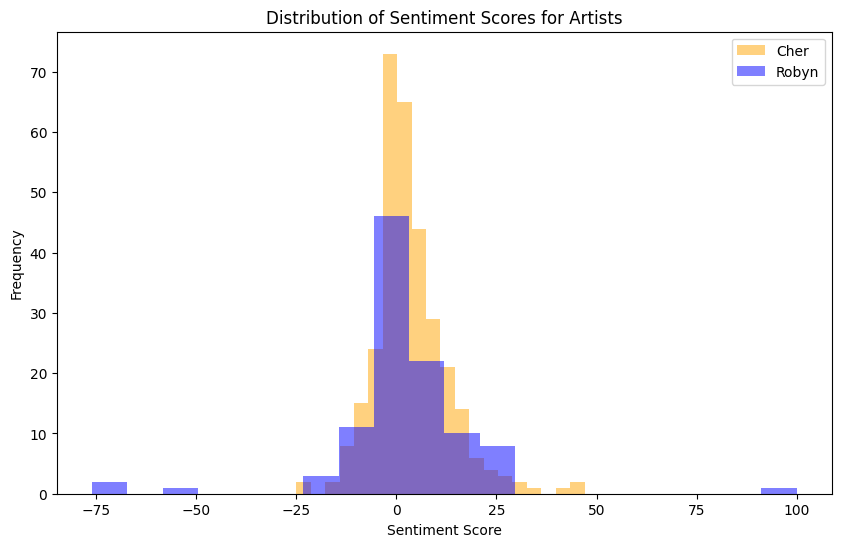

In [12]:
cher_sentiment = lyrics_data.loc['cher', 'sentiment_score']
robyn_sentiment = lyrics_data.loc['robyn', 'sentiment_score']
plt.figure(figsize=(10,6))
# Using alpha=.5 to visualize overlapping distributions
plt.hist(cher_sentiment, bins=20, alpha=.5, label='Cher', color='orange')
plt.hist(robyn_sentiment, bins=20, alpha=.5, label='Robyn', color='blue')
plt.title('Distribution of Sentiment Scores for Artists')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [13]:
# your code here
# First obvious emojis for each category in iOS keyboard
positive_emojis = ['😀', '😃', '😄', '😁', '☺️', '😊', '😇', '🙂', '😍', '🥰']
negative_emojis = ['😞', '😔', '😟', '😕', '🙁', '☹️', '😣', '😖', '😫', '😩']

# Assign numerical value to each emoji as a DataFrame
positive_emoji_df = pd.DataFrame({'emoji': positive_emojis, 'score': 1})
negative_emoji_df = pd.DataFrame({'emoji': negative_emojis, 'score': -1})

# Since only score matters, make dictionary object where emojis map to their assigned values
emoji_sentiment = pd.concat([positive_emoji_df, negative_emoji_df], ignore_index=True)
emoji_sentiment_dict = pd.Series(emoji_sentiment['score'].values, index=emoji_sentiment['emoji']).to_dict()


In [14]:
def calculate_emoji_sentiment(text, emoji_sentiment_dict):
    if pd.isnull(text): # Check for empty
        return 0 # Return value of zero if no emoji in text
    return sum(emoji_sentiment_dict.get(char, 0) for char in text) # Check ea. character; return sum

### Apply calculate_emoji_sentiment and save score for each description

In [15]:
twitter_data['emoji_sentiment_score'] = twitter_data['description'].apply(lambda x: calculate_emoji_sentiment(x, emoji_sentiment_dict))
twitter_data.groupby('artist')['emoji_sentiment_score'].mean()

artist
cher     0.006446
robyn    0.002531
Name: emoji_sentiment_score, dtype: float64

Q: What is the average sentiment of your two artists? 

A: The average sentiment is 0.0064 for Cher and 0.0025 for Robyn. These averages being so close to zero may largely be attributed to most of the posts containing zero emojis. In other iterations, it may be useful to include emojis with a dictionary of words as there might not be enough significance using emojis alone. Otherwise, we may interpret sentiment of these two artists as neutral on emoji terms.

In [16]:
def extract_emoji_counts(df, emoji_list):
    emoji_counts = Counter() # Initialize object
    for description in df['description'].fillna(''): # Handle nulls
        emojis = [e for e in description if e in emoji_list] # Check for emojis and save in list
        emoji_counts.update(emojis) # Update counter with list above
    return emoji_counts

def top_emoji_artist(df, positive_emojis, negative_emojis):
    artist_emojis = {} # Initialize
    for artist in df['artist'].unique(): # For each unique artist
        artist_data = df[df['artist'] == artist] # Subset the DataFrame by artist

        # Create counter of positive and negative emoji counts; store top one
        positive_counts = extract_emoji_counts(artist_data, positive_emojis)
        top_positive_emoji = positive_counts.most_common(1)
        negative_counts = extract_emoji_counts(artist_data, negative_emojis)
        top_negative_emoji = negative_counts.most_common(1)

        # For printing purposes, make dictionary to output results
        artist_emojis[artist] = {
            'top_positive_emoji': top_positive_emoji,
            'top_negative_emoji': top_negative_emoji
        }
    return artist_emojis

In [18]:
top_emoji_artist(twitter_data, positive_emojis, negative_emojis)

{'cher': {'top_positive_emoji': [('😍', 8189)],
  'top_negative_emoji': [('😔', 387)]},
 'robyn': {'top_positive_emoji': [('😍', 264)],
  'top_negative_emoji': [('😩', 13)]}}

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: Cher's most popular positive emoji is a smiling heart-eye emoji 😍 at 8189. Her most popular negative emoji is a frowning emoji 😔 at 387. Robyn's most popular positive emoji is the same as Cher's, but 264 times. Her most popular negative emoji is a gasping frowning face 😩 at 13 times.